# Parameter Results

In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append('../src')
import raybay
from utils import get_pars_df, get_percent_diff

## Full 100 Iterations

In [2]:
full_df = pd.concat([get_pars_df(plan_type) for plan_type in ['random', 'bayes']])
full_df.groupby(['par_name', 'plan_type'])['par_val'].describe()

count         mean         std          min  \
par_name              plan_type                                                
10_SpinalCord_MaxDVH  bayes       10.0   499.328208  309.050645   340.000000   
                      random      10.0   625.560770  256.277763   378.176499   
11_SpinalCord_MaxDose bayes       10.0  1250.372824  773.216535   650.000000   
                      random      10.0  1680.177670  608.761934   770.588141   
1_Chestwall_MaxDVH    bayes       10.0  2020.520752  719.722869  1262.298221   
                      random      10.0  2477.726410  519.799982  1412.308819   
2_D2cm_MaxDose        bayes       10.0  1498.477020  363.322726   952.369579   
                      random      10.0  1515.130143  405.799203   634.773748   
3_Esophagus_MaxDVH    bayes       10.0  1022.888250  635.869546   470.000000   
                      random      10.0  1017.519002  389.803216   516.106307   
4_Lungs_MaxDVH        bayes       10.0   742.496904  377.294066   290.000000   
                      random      10.0   743.871810  267.735372   354.353024   
5_Lungs_MaxDVH        bayes       10.0   611.187346  254.967867   310.000000   
                      random      10.0   842.536139  246.516364   451.487557   
7_PTV_MaxDose         bayes       10.0  6525.875442  886.766695  5600.000000   
                      random      10.0  6679.553925  672.320191  5987.884459   
8_Rib_MaxDVH          bayes       10.0  2673.774861  522.086755  1956.915900   
                      random      10.0  2784.646473  398.646192  2030.388077   
9_Rib_MaxDose         bayes       10.0  2468.390186  648.338585  1172.466576   
                      random      10.0  2855.993164  707.286087  1714.632749   

                                         25%          50%          75%  \
par_name              plan_type                                          
10_SpinalCord_MaxDVH  bayes       340.000000   340.000000   474.730399   
                      random      387.685410   621.095569   734.878138   
11_SpinalCord_MaxDose bayes       655.426591   900.731175  1844.039238   
                      random     1278.753220  1797.809231  2234.129091   
1_Chestwall_MaxDVH    bayes      1459.580816  1693.245221  2785.600282   
                      random     2404.545811  2620.741823  2882.632130   
2_D2cm_MaxDose        bayes      1201.653989  1535.492549  1758.992514   
                      random     1317.498529  1607.358585  1791.683507   
3_Esophagus_MaxDVH    bayes       471.425903   731.976602  1719.806421   
                      random      637.698809  1081.790209  1383.001609   
4_Lungs_MaxDVH        bayes       388.170255   727.138284  1137.183720   
                      random      527.235790   798.045019   951.933582   
5_Lungs_MaxDVH        bayes       387.224354   646.931342   747.716328   
                      random      703.737407   843.374506   926.890924   
7_PTV_MaxDose         bayes      5600.000000  6650.654931  7180.460047   
                      random     6040.451578  6466.441918  7426.813833   
8_Rib_MaxDVH          bayes      2208.740929  2749.351843  3200.000000   
                      random     2485.639271  2892.737045  3100.879766   
9_Rib_MaxDose         bayes      2105.971537  2482.248220  2998.093336   
                      random     2528.340033  2819.294287  2973.467236   

                                         max  
par_name              plan_type               
10_SpinalCord_MaxDVH  bayes      1267.869230  
                      random     1165.258786  
11_SpinalCord_MaxDose bayes      2600.000000  
                      random     2290.749615  
1_Chestwall_MaxDVH    bayes      3000.000000  
                      random     2959.820315  
2_D2cm_MaxDose        bayes      2070.358038  
                      random     1935.331710  
3_Esophagus_MaxDVH    bayes      1880.000000  
                      random     1428.826988  
4_Lungs_MaxDVH        bayes      1160.000000  
                      random    

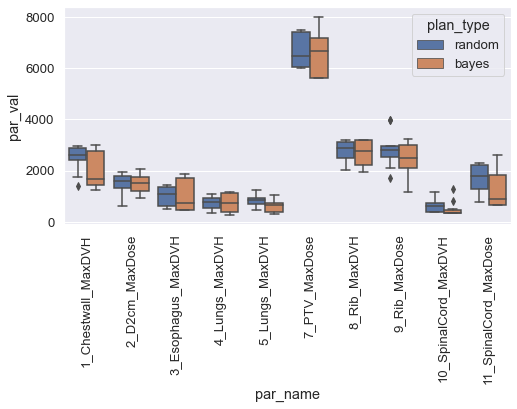

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='par_name', y='par_val', hue='plan_type', data=full_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Compare to goal values

In [4]:
def get_par_diff(row):
    return get_percent_diff(row, 'par_val', 'goal_val')

full_df['par_diff'] = full_df.apply(get_par_diff, axis=1)
full_df.groupby(['par_name', 'plan_type'])['par_diff'].describe()

count       mean        std        min  \
par_name              plan_type                                           
10_SpinalCord_MaxDVH  bayes       10.0 -63.284691  22.724312 -75.000000   
                      random      10.0 -54.002885  18.843953 -72.192904   
11_SpinalCord_MaxDose bayes       10.0 -51.908738  29.739098 -75.000000   
                      random      10.0 -35.377782  23.413921 -70.361995   
1_Chestwall_MaxDVH    bayes       10.0 -32.649308  23.990762 -57.923393   
                      random      10.0 -17.409120  17.326666 -52.923039   
2_D2cm_MaxDose        bayes       10.0 -42.545409  11.014988 -60.317934   
                      random      10.0 -41.823922  13.844517 -73.551094   
3_Esophagus_MaxDVH    bayes       10.0 -45.591051  33.822848 -75.000000   
                      random      10.0 -45.876649  20.734214 -72.547537   
4_Lungs_MaxDVH        bayes       10.0 -35.991646  32.525351 -75.000000   
                      random      10.0 -35.873120  23.080636 -69.452325   
5_Lungs_MaxDVH        bayes       10.0 -50.710698  20.561925 -75.000000   
                      random      10.0 -32.053537  19.880352 -63.589713   
7_PTV_MaxDose         bayes       10.0 -18.426557  11.084584 -30.000000   
                      random      10.0 -16.505576   8.404002 -25.151444   
8_Rib_MaxDVH          bayes       10.0 -16.444536  16.315211 -38.846378   
                      random      10.0 -12.979798  12.457694 -36.550373   
9_Rib_MaxDose         bayes       10.0 -38.290245  16.208465 -70.688336   
                      random      10.0 -28.600171  17.682152 -57.134181   

                                       25%        50%        75%        max  
par_name              plan_type                                              
10_SpinalCord_MaxDVH  bayes     -75.000000 -75.000000 -65.093353  -6.774321  
                      random    -71.493720 -54.331208 -45.964843 -14.319207  
11_SpinalCord_MaxDose bayes     -74.791285 -65.356493 -29.075414   0.000000  
                      random    -50.817184 -30.853491 -14.071958 -11.894246  
1_Chestwall_MaxDVH    bayes     -51.347306 -43.558493  -7.146657   0.000000  
                      random    -19.848473 -12.641939  -3.912262  -1.339323  
2_D2cm_MaxDose        bayes     -52.202151 -38.583795 -35.924286 -29.291051  
                      random    -48.009456 -35.488943 -32.062626 -29.737902  
3_Esophagus_MaxDVH    bayes     -74.924154 -61.065074  -8.520935   0.000000  
                      random    -66.079851 -42.457968 -26.436085 -23.998564  
4_Lungs_MaxDVH        bayes     -66.537047 -37.315665  -1.966921   0.000000  
                      random    -54.548639 -31.203016 -17.936760  -6.187628  
5_Lungs_MaxDVH        bayes     -68.772230 -47.828118 -39.700296 -16.220654  
                      random    -43.246983 -31.985927 -25.250732  -0.641208  
7_PTV_MaxDose         bayes     -30.000000 -16.866813 -10.244249   0.000000  
                      random    -24.494355 -19.169476  -7.164827  -6.614994  
8_Rib_MaxDVH          bayes     -30.976846 -14.082755   0.000000   0.000000  
                      random    -22.323773  -9.601967  -3.097507  -0.422641  
9_Rib_MaxDose         bayes     -47.350712 -37.943795 -25.047667 -18.757440  
                      random    -36.791499 -29.517643 -25.663319  -0.979289

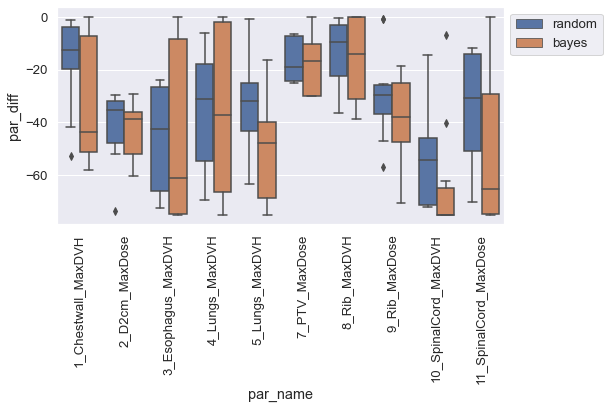

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.boxplot(x='par_name', y='par_diff', hue='plan_type', data=full_df, ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

### Rescale PTV values

In [6]:
def get_par_diff2(row):
    if 'PTV' in row['par_name']:
        return 100*(row['par_val'] - row['goal_val'])/(row['goal_val'] - 4800)
    return get_par_diff(row)

full_df['par_diff2'] = full_df.apply(get_par_diff2, axis=1)
full_df.groupby(['par_name', 'plan_type'])['par_diff2'].describe()

count       mean        std        min  \
par_name              plan_type                                           
10_SpinalCord_MaxDVH  bayes       10.0 -63.284691  22.724312 -75.000000   
                      random      10.0 -54.002885  18.843953 -72.192904   
11_SpinalCord_MaxDose bayes       10.0 -51.908738  29.739098 -75.000000   
                      random      10.0 -35.377782  23.413921 -70.361995   
1_Chestwall_MaxDVH    bayes       10.0 -32.649308  23.990762 -57.923393   
                      random      10.0 -17.409120  17.326666 -52.923039   
2_D2cm_MaxDose        bayes       10.0 -42.545409  11.014988 -60.317934   
                      random      10.0 -41.823922  13.844517 -73.551094   
3_Esophagus_MaxDVH    bayes       10.0 -45.591051  33.822848 -75.000000   
                      random      10.0 -45.876649  20.734214 -72.547537   
4_Lungs_MaxDVH        bayes       10.0 -35.991646  32.525351 -75.000000   
                      random      10.0 -35.873120  23.080636 -69.452325   
5_Lungs_MaxDVH        bayes       10.0 -50.710698  20.561925 -75.000000   
                      random      10.0 -32.053537  19.880352 -63.589713   
7_PTV_MaxDose         bayes       10.0 -46.066392  27.711459 -75.000000   
                      random      10.0 -41.263940  21.010006 -62.878611   
8_Rib_MaxDVH          bayes       10.0 -16.444536  16.315211 -38.846378   
                      random      10.0 -12.979798  12.457694 -36.550373   
9_Rib_MaxDose         bayes       10.0 -38.290245  16.208465 -70.688336   
                      random      10.0 -28.600171  17.682152 -57.134181   

                                       25%        50%        75%        max  
par_name              plan_type                                              
10_SpinalCord_MaxDVH  bayes     -75.000000 -75.000000 -65.093353  -6.774321  
                      random    -71.493720 -54.331208 -45.964843 -14.319207  
11_SpinalCord_MaxDose bayes     -74.791285 -65.356493 -29.075414   0.000000  
                      random    -50.817184 -30.853491 -14.071958 -11.894246  
1_Chestwall_MaxDVH    bayes     -51.347306 -43.558493  -7.146657   0.000000  
                      random    -19.848473 -12.641939  -3.912262  -1.339323  
2_D2cm_MaxDose        bayes     -52.202151 -38.583795 -35.924286 -29.291051  
                      random    -48.009456 -35.488943 -32.062626 -29.737902  
3_Esophagus_MaxDVH    bayes     -74.924154 -61.065074  -8.520935   0.000000  
                      random    -66.079851 -42.457968 -26.436085 -23.998564  
4_Lungs_MaxDVH        bayes     -66.537047 -37.315665  -1.966921   0.000000  
                      random    -54.548639 -31.203016 -17.936760  -6.187628  
5_Lungs_MaxDVH        bayes     -68.772230 -47.828118 -39.700296 -16.220654  
                      random    -43.246983 -31.985927 -25.250732  -0.641208  
7_PTV_MaxDose         bayes     -75.000000 -42.167033 -25.610624   0.000000  
                      random    -61.235888 -47.923690 -17.912068 -16.537486  
8_Rib_MaxDVH          bayes     -30.976846 -14.082755   0.000000   0.000000  
                      random    -22.323773  -9.601967  -3.097507  -0.422641  
9_Rib_MaxDose         bayes     -47.350712 -37.943795 -25.047667 -18.757440  
                      random    -36.791499 -29.517643 -25.663319  -0.979289

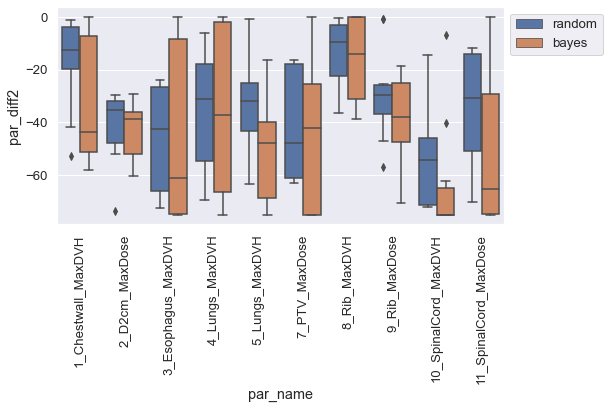

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.boxplot(x='par_name', y='par_diff2', hue='plan_type', data=full_df, ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

## With Stopping Conditions

In [8]:
stop_df = pd.concat([get_pars_df(plan_type, stop=True) for plan_type in ['random', 'bayes']])
stop_df.groupby(['par_name', 'plan_type'])['par_val'].describe()

count         mean         std          min  \
par_name              plan_type                                                
10_SpinalCord_MaxDVH  bayes       10.0   603.122098  374.473062   340.000000   
                      random      10.0   721.476701  397.546703   391.018448   
11_SpinalCord_MaxDose bayes       10.0  1732.673669  677.848205   671.706365   
                      random      10.0  1809.786401  509.687962   828.535061   
1_Chestwall_MaxDVH    bayes       10.0  2077.477809  739.928437  1075.346500   
                      random      10.0  1395.905078  307.259218   917.081475   
2_D2cm_MaxDose        bayes       10.0  1395.084756  398.404048   924.991245   
                      random      10.0  1239.821347  295.174224   771.754647   
3_Esophagus_MaxDVH    bayes       10.0   981.394222  332.376710   470.000000   
                      random      10.0   969.568051  307.095342   698.709770   
4_Lungs_MaxDVH        bayes       10.0   646.082328  305.807347   290.000000   
                      random      10.0   445.910013  118.171295   354.353024   
5_Lungs_MaxDVH        bayes       10.0   681.331538  346.911618   310.000000   
                      random      10.0   525.095780  157.406130   398.636264   
7_PTV_MaxDose         bayes       10.0  6724.448522  894.135485  5600.000000   
                      random      10.0  6294.233122  644.706818  5943.831215   
8_Rib_MaxDVH          bayes       10.0  2650.174633  570.552871  1698.422704   
                      random      10.0  2802.012349  540.796035  1667.026449   
9_Rib_MaxDose         bayes       10.0  2356.795185  487.507655  1729.856876   
                      random      10.0  2286.659171  321.214304  1834.956515   

                                         25%          50%          75%  \
par_name              plan_type                                          
10_SpinalCord_MaxDVH  bayes       340.000000   391.018448   775.163210   
                      random      391.018448   484.656711  1144.976892   
11_SpinalCord_MaxDose bayes      1134.323418  2094.863334  2153.777269   
                      random     1865.419620  2094.863334  2094.863334   
1_Chestwall_MaxDVH    bayes      1422.947968  1955.496596  2798.022889   
                      random     1412.308819  1412.308819  1444.226265   
2_D2cm_MaxDose        bayes      1095.995404  1321.784333  1557.421570   
                      random     1038.197293  1249.466558  1509.731097   
3_Esophagus_MaxDVH    bayes       857.249663   985.158272  1087.823538   
                      random      857.249663   857.249663  1035.763851   
4_Lungs_MaxDVH        bayes       371.226082   607.495199   887.966050   
                      random      354.353024   366.605338   572.525595   
5_Lungs_MaxDVH        bayes       451.487557   518.660698   980.899152   
                      random      451.487557   451.487557   546.752578   
7_PTV_MaxDose         bayes      5987.884459  6813.348325  7367.892767   
                      random     5987.884459  5987.884459  6114.136351   
8_Rib_MaxDVH          bayes      2199.041018  2890.558045  3101.455430   
                      random     3034.431040  3052.908079  3052.908079   
9_Rib_MaxDose         bayes      2113.401703  2205.400605  2615.866504   
                      random     2113.401703  2113.401703  2607.793188   

                                         max  
par_name              plan_type               
10_SpinalCord_MaxDVH  bayes      1297.910345  
                      random     1297.910345  
11_SpinalCord_MaxDose bayes      2600.000000  
                      random     2167.859011  
1_Chestwall_MaxDVH    bayes      3000.000000  
                      random     1966.773427  
2_D2cm_MaxDose        bayes      2198.037603  
                      random     1561.833197  
3_Esophagus_MaxDVH    bayes      1664.085905  
                      random     1727.911580  
4_Lungs_MaxDVH        bayes      1083.482739  
                      random    

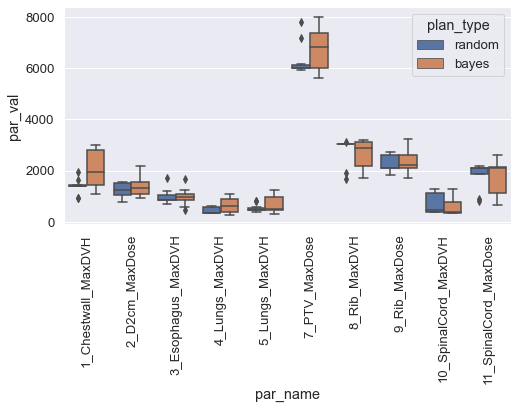

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='par_name', y='par_val', hue='plan_type', data=stop_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Compare to goal values

In [10]:
stop_df['par_diff'] = stop_df.apply(get_par_diff, axis=1)
stop_df.groupby(['par_name', 'plan_type'])['par_diff'].describe()

count       mean        std        min  \
par_name              plan_type                                           
10_SpinalCord_MaxDVH  bayes       10.0 -55.652787  27.534784 -75.000000   
                      random      10.0 -46.950243  29.231375 -71.248644   
11_SpinalCord_MaxDose bayes       10.0 -33.358705  26.071085 -74.165140   
                      random      10.0 -30.392831  19.603383 -68.133267   
1_Chestwall_MaxDVH    bayes       10.0 -30.750740  24.664281 -64.155117   
                      random      10.0 -53.469831  10.241974 -69.430617   
2_D2cm_MaxDose        bayes       10.0 -46.731671  11.406735 -61.458698   
                      random      10.0 -51.938956  11.485515 -67.843556   
3_Esophagus_MaxDVH    bayes       10.0 -47.798180  17.679612 -75.000000   
                      random      10.0 -48.427231  16.334859 -62.834587   
4_Lungs_MaxDVH        bayes       10.0 -44.303248  26.362702 -75.000000   
                      random      10.0 -61.559482  10.187181 -69.452325   
5_Lungs_MaxDVH        bayes       10.0 -45.053908  27.976743 -75.000000   
                      random      10.0 -57.653566  12.694043 -67.851914   
7_PTV_MaxDose         bayes       10.0 -15.944393  11.176694 -30.000000   
                      random      10.0 -21.322086   8.058835 -25.702110   
8_Rib_MaxDVH          bayes       10.0 -17.182043  17.829777 -46.924291   
                      random      10.0 -12.437114  16.899876 -47.905423   
9_Rib_MaxDose         bayes       10.0 -41.080120  12.187691 -56.753578   
                      random      10.0 -42.833521   8.030358 -54.126087   

                                       25%        50%        75%        max  
par_name              plan_type                                              
10_SpinalCord_MaxDVH  bayes     -75.000000 -71.248644 -43.002705  -4.565416  
                      random    -71.248644 -64.363477 -15.810523  -4.565416  
11_SpinalCord_MaxDose bayes     -56.372176 -19.428333 -17.162413   0.000000  
                      random    -28.253092 -19.428333 -19.428333 -16.620807  
1_Chestwall_MaxDVH    bayes     -52.568401 -34.816780  -6.732570   0.000000  
                      random    -52.923039 -52.923039 -51.859125 -34.440886  
2_D2cm_MaxDose        bayes     -55.326879 -47.938893 -40.184031 -24.930410  
                      random    -62.195425 -47.938893 -47.938893 -35.658888  
3_Esophagus_MaxDVH    bayes     -54.401614 -47.597964 -42.137046 -11.484792  
                      random    -54.401614 -54.401614 -44.906178  -8.089810  
4_Lungs_MaxDVH        bayes     -67.997752 -47.629724 -23.451203  -6.596316  
                      random    -69.452325 -68.396092 -50.644345 -46.681174  
5_Lungs_MaxDVH        bayes     -63.589713 -58.172524 -20.895230   0.000000  
                      random    -63.589713 -63.589713 -55.907050 -34.618148  
7_PTV_MaxDose         bayes     -25.151444 -14.833146  -7.901340   0.000000  
                      random    -25.151444 -25.151444 -23.573296  -2.581139  
8_Rib_MaxDVH          bayes     -31.279968  -9.670061  -3.079518   0.000000  
                      random     -5.174030  -4.596623  -4.596623  -2.424905  
9_Rib_MaxDose         bayes     -47.164957 -44.864985 -34.603337 -18.757440  
                      random    -47.164957 -47.164957 -34.805170 -31.756184

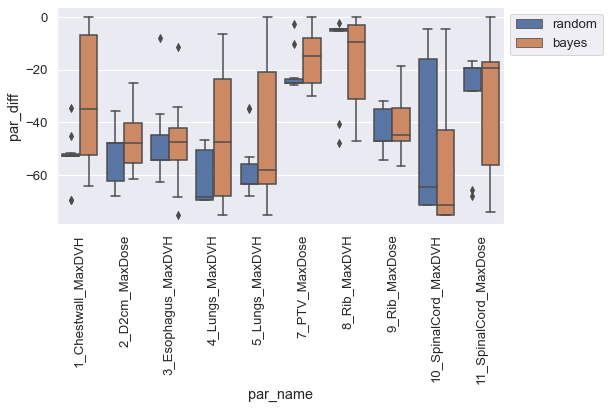

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.boxplot(x='par_name', y='par_diff', hue='plan_type', data=stop_df, ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

### Rescale PTV values

In [12]:
stop_df['par_diff2'] = stop_df.apply(get_par_diff2, axis=1)
stop_df.groupby(['par_name', 'plan_type'])['par_diff2'].describe()

count       mean        std        min  \
par_name              plan_type                                           
10_SpinalCord_MaxDVH  bayes       10.0 -55.652787  27.534784 -75.000000   
                      random      10.0 -46.950243  29.231375 -71.248644   
11_SpinalCord_MaxDose bayes       10.0 -33.358705  26.071085 -74.165140   
                      random      10.0 -30.392831  19.603383 -68.133267   
1_Chestwall_MaxDVH    bayes       10.0 -30.750740  24.664281 -64.155117   
                      random      10.0 -53.469831  10.241974 -69.430617   
2_D2cm_MaxDose        bayes       10.0 -46.731671  11.406735 -61.458698   
                      random      10.0 -51.938956  11.485515 -67.843556   
3_Esophagus_MaxDVH    bayes       10.0 -47.798180  17.679612 -75.000000   
                      random      10.0 -48.427231  16.334859 -62.834587   
4_Lungs_MaxDVH        bayes       10.0 -44.303248  26.362702 -75.000000   
                      random      10.0 -61.559482  10.187181 -69.452325   
5_Lungs_MaxDVH        bayes       10.0 -45.053908  27.976743 -75.000000   
                      random      10.0 -57.653566  12.694043 -67.851914   
7_PTV_MaxDose         bayes       10.0 -39.860984  27.941734 -75.000000   
                      random      10.0 -53.305215  20.147088 -64.255275   
8_Rib_MaxDVH          bayes       10.0 -17.182043  17.829777 -46.924291   
                      random      10.0 -12.437114  16.899876 -47.905423   
9_Rib_MaxDose         bayes       10.0 -41.080120  12.187691 -56.753578   
                      random      10.0 -42.833521   8.030358 -54.126087   

                                       25%        50%        75%        max  
par_name              plan_type                                              
10_SpinalCord_MaxDVH  bayes     -75.000000 -71.248644 -43.002705  -4.565416  
                      random    -71.248644 -64.363477 -15.810523  -4.565416  
11_SpinalCord_MaxDose bayes     -56.372176 -19.428333 -17.162413   0.000000  
                      random    -28.253092 -19.428333 -19.428333 -16.620807  
1_Chestwall_MaxDVH    bayes     -52.568401 -34.816780  -6.732570   0.000000  
                      random    -52.923039 -52.923039 -51.859125 -34.440886  
2_D2cm_MaxDose        bayes     -55.326879 -47.938893 -40.184031 -24.930410  
                      random    -62.195425 -47.938893 -47.938893 -35.658888  
3_Esophagus_MaxDVH    bayes     -54.401614 -47.597964 -42.137046 -11.484792  
                      random    -54.401614 -54.401614 -44.906178  -8.089810  
4_Lungs_MaxDVH        bayes     -67.997752 -47.629724 -23.451203  -6.596316  
                      random    -69.452325 -68.396092 -50.644345 -46.681174  
5_Lungs_MaxDVH        bayes     -63.589713 -58.172524 -20.895230   0.000000  
                      random    -63.589713 -63.589713 -55.907050 -34.618148  
7_PTV_MaxDose         bayes     -62.878611 -37.082865 -19.753351   0.000000  
                      random    -62.878611 -62.878611 -58.933239  -6.452848  
8_Rib_MaxDVH          bayes     -31.279968  -9.670061  -3.079518   0.000000  
                      random     -5.174030  -4.596623  -4.596623  -2.424905  
9_Rib_MaxDose         bayes     -47.164957 -44.864985 -34.603337 -18.757440  
                      random    -47.164957 -47.164957 -34.805170 -31.756184

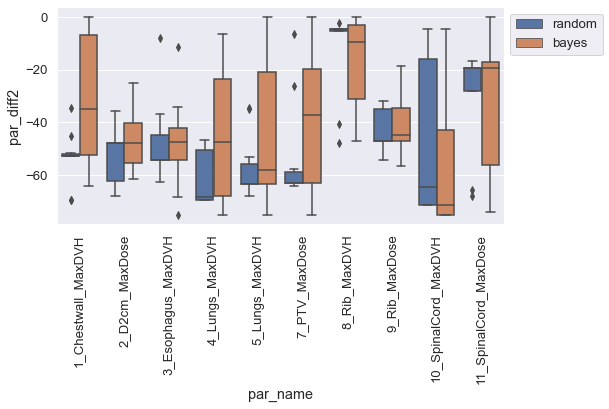

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.boxplot(x='par_name', y='par_diff2', hue='plan_type', data=stop_df, ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));